In [1]:
import cv2
import numpy as np
import scipy.io as sio

In [2]:
train = sio.loadmat('train.m')['train'][0][0]

In [3]:
X = train[0]

In [57]:
root = '../backup/'
vid_train = np.load(root+'vid_train.npy')
labels_train = np.load(root+'labels_train.npy').item(0)

In [5]:
Y = []
for v in train[1]:
    Y.append(labels_train[v])

In [32]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

clf = SVC(C=10000000,gamma=.01)
clf.fit(X, Y)

SVC(C=10000000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [33]:
clf.score(X,Y)

0.78042328042328046

In [35]:
val = sio.loadmat('val.mat')['val'][0][0]
X_val = val[0]
labels_val = np.load(root+'labels_val.npy').item(0)
Y_val = []
for v in val[1]:
    Y_val.append(labels_val[v])

TypeError: unhashable type: 'numpy.ndarray'

In [40]:
val[1]

array([[ 0.03274657,  0.14131878,  0.13277177, ...,  0.07451741,
         0.0565028 ,  0.0566312 ],
       [ 0.03653976,  0.19280012,  0.20737691, ...,  0.21104017,
         0.17119518,  0.17564745],
       [ 0.03423406,  0.29589587,  0.30041977, ...,  0.19053468,
         0.1276725 ,  0.1478512 ],
       ..., 
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [45]:
t = sio.loadmat('../Train_AFEW/AlignedFaces_LBPTOP_Points/LBPTOP/000029301.mat')['LBPTOPFeat']

In [73]:
X = np.zeros((756,2832))
y = np.zeros((756,1))

for i, v in enumerate(sorted(os.listdir('../Train_AFEW/AlignedFaces_LBPTOP_Points/LBPTOP'))):
#     print(i,v)
    X[i,:] = sio.loadmat('../Train_AFEW/AlignedFaces_LBPTOP_Points/LBPTOP/%s'%v)['LBPTOPFeat']
    y[i] = labels_train[v[:-4]]

In [47]:
import os
len(os.listdir('../Train_AFEW/AlignedFaces_LBPTOP_Points/LBPTOP/'))

756

In [48]:
t.shape

(1, 2832)

In [53]:
X = np.zeros((756,2832))
X[1,:].shape

(2832,)

In [88]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

clf = SVC(C=100,gamma=.01)
clf.fit(X, y)
clf.score(X_val,y_val)

/usr/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.35579514824797842

In [66]:
clf.score(X,Y)

1.0

In [76]:
X_val = np.zeros((371,2832))
y_val = np.zeros((371,1))

for i, v in enumerate(sorted(os.listdir('../Val_AFEW/AlignedFaces_LBPTOP_Points_Val/LBPTOP'))):
#     print(i,v)
    X_val[i,:] = sio.loadmat('../Val_AFEW/AlignedFaces_LBPTOP_Points_Val/LBPTOP/%s'%v)['LBPTOPFeat']
    y_val[i] = labels_val[v[:-4]]

In [84]:
clf.score(X_val,y_val)

0.16981132075471697

In [90]:
y_val.flatten

<function ndarray.flatten>

In [81]:
X_val.shape

(371, 2832)

In [83]:
X.shape

(756, 2832)

In [100]:
rslt = []
for c in range(1,100):
    clf = SVC(C=c,gamma=0.1)
    clf.fit(X, y)
    rslt.append(clf.score(X_val, y_val))

/usr/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


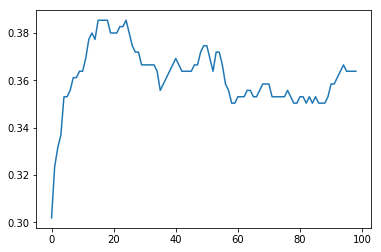

In [101]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(rslt)

In [109]:
clf = SVC(C=17,gamma=0.1)
clf.fit(X, y)
clf.score(X_val, y_val)

/usr/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.38544474393530997

In [108]:
rslt[17]

0.38544474393530997

In [110]:
clf.score(X, y)

0.74603174603174605

In [111]:
rslt_train = []
for c in range(1,25):
    clf = SVC(C=c,gamma=0.1)
    clf.fit(X, y)
    rslt_train.append(clf.score(X, y))

/usr/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


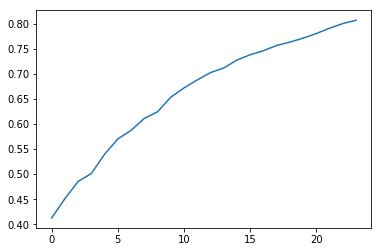

In [112]:
plt.plot(rslt_train)

[ 3.] [ 6.]


/usr/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [137]:
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    classes = ['Ang', 'Dis', 'Fea', 'Hap', 'Neu', 'Sad', 'Sur']
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    np.set_printoptions(precision=2)
    
    if normalize:
        cm = cm.astype('int') / cm.sum(axis=1)[:, np.newaxis]
        cm *= 100
        for i in range(0,7):
            for j in range(0,7):
                cm[i][j] = '%.02f' % cm[i][j]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
#     print((cm.astype('float') / cm.sum(axis=1)[:, np.newaxis])*100)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [134]:
conf_mat = np.zeros((7,7))

for j in range(0, len(y_val)):
    pl = int(clf.predict([X_val[j,:]])[0])
    yl = int(y_val[j][0])
    conf_mat[yl][pl] += 1

Normalized confusion matrix


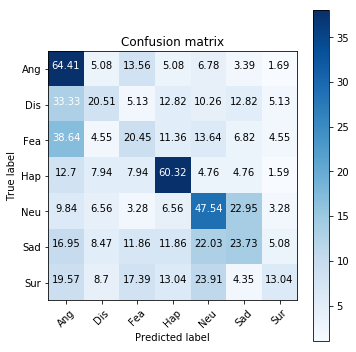

In [138]:
np.set_printoptions(precision=2)

plt.figure(figsize=(5,5))
plot_confusion_matrix(conf_mat, normalize=True)
plt.show()